In [ ]:
import torch
from transformers import pipeline

hf_name = 'pszemraj/led-large-book-summary'

summarizer = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)

Device set to use cuda:0


In [ ]:
wall_of_text = "your words here"

result = summarizer(
    wall_of_text,
    min_length=16,
    max_length=256,
    no_repeat_ngram_size=3,
    encoder_no_repeat_ngram_size=3,
    repetition_penalty=3.5,
    num_beams=4,
    early_stopping=True,
)

Your max_length is set to 256, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Input ids are automatically padded from 5 to 1024 to be a multiple of `config.attention_window`: 1024


In [ ]:
pip install textsum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 867.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha25

In [ ]:
pip install torch transformers pymupdf pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 53.6 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from PIL import Image, ImageDraw, ImageFont

# Choose model based on RAM constraints (base recommended for 4GB)
MODEL_NAME = "pszemraj/led-base-book-summary"  # Switch to led-large-book-summary if sufficient RAM
DEVICE = 0 if torch.cuda.is_available() else -1

# Initialize summarization pipeline
summarizer = pipeline(
    "summarization",
    MODEL_NAME,
    device=DEVICE,
    torch_dtype=torch.float16 if DEVICE == 0 else None
)

def process_pdf(pdf_path, output_folder):
    doc = fitz.open(pdf_path)

    for page_num, page in enumerate(doc):
        # Extract text
        text = page.get_text()

        # Summarize with model-optimized parameters
        summary = summarizer(
            text,
            min_length=16,
            max_length=48,
            no_repeat_ngram_size=3,
            encoder_no_repeat_ngram_size=3,
            repetition_penalty=3.5,
            num_beams=4,
            early_stopping=True
        )[0]['summary_text']

        # Create summary image
        img = Image.new('RGB', (800, 600), color=(255, 255, 255))
        d = ImageDraw.Draw(img)
        # Replace this line
# font = ImageFont.truetype("arial.ttf", 18)
# with this:
        font = ImageFont.load_default()

        d.text((10, 10), summary, fill=(0, 0, 0), font=font)
        img.save(f"{output_folder}/page_{page_num+1}_summary.jpg")

# Usage
process_pdf("/content/the-metamorphosis.pdf", "/content/output_summaries")


Device set to use cuda:0
Input ids are automatically padded from 73 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 384 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 452 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 548 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 441 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 460 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 426 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 457 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 446 to 1024 to be a multiple of `config.attention_window`: 1024
You seem to be using the pipelines seque

In [ ]:
!apt-get install -y fonts-liberation
!fc-cache -fv

# Replace "arial.ttf" with "LiberationSans-Regular.ttf"
font = ImageFont.truetype("LiberationSans-Regular.ttf", 18)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-liberation is already the newest version (1:1.07.4-11).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
# Replace this line
# font = ImageFont.truetype("arial.ttf", 18)
# with this:
font = ImageFont.load_default()

In [ ]:
from textsum.summarize import Summarizer

summarizer = Summarizer(
    model_name_or_path=MODEL_NAME,
    token_batch_length=2048  # Reduce for lower RAM usage
)



In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from diffusers import AutoPipelineForText2Image
import time

# Configuration
SUMMARY_MODEL = "pszemraj/led-base-book-summary"
IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model
OUTPUT_SIZE = (512, 512)  # Reduced resolution

def load_summarizer():
    return pipeline(
        "summarization",
        SUMMARY_MODEL,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16 if torch.cuda.is_available() else None
    )

def load_image_generator():
    pipe = AutoPipelineForText2Image.from_pretrained(
        IMAGE_MODEL,
        torch_dtype=torch.float16,
        use_safetensors=True
    )
    if torch.cuda.is_available():
        pipe.to("cuda")
        pipe.enable_model_cpu_offload()
    pipe.enable_attention_slicing()
    return pipe

def process_pdf(pdf_path, output_folder):
    # Process pages sequentially to save memory
    doc = fitz.open(pdf_path)

    for page_num in range(len(doc)):
        # Load models fresh for each page (memory management)
        summarizer = load_summarizer()
        page = doc.load_page(page_num)

        # Summarization
        text = page.get_text()
        summary = summarizer(
            text,
            max_length=48,
            min_length=32,
            no_repeat_ngram_size=3
        )[0]['summary_text']

        # Cleanup summarization model
        del summarizer
        torch.cuda.empty_cache()

        # Image Generation
        image_pipe = load_image_generator()
        anime_prompt = f"{summary}, anime style, vibrant colors, digital art"
        image = image_pipe(
            anime_prompt,
            num_inference_steps=20,
            height=OUTPUT_SIZE[1],
            width=OUTPUT_SIZE[0]
        ).images[0]

        # Save output
        image.save(f"{output_folder}/page_{page_num+1}_anime.jpg")

        # Cleanup image generator
        del image_pipe
        torch.cuda.empty_cache()

# Usage (will take significant time)
process_pdf("/content/the-metamorphosis.pdf", "anime_output")


Device set to use cuda:0


OSError: Could not find the necessary `safetensors` weights in {'unet/diffusion_pytorch_model.bin', 'vae/diffusion_pytorch_model.bin', 'safety_checker/pytorch_model.bin', 'text_encoder/pytorch_model.bin'} (variant=None)

In [ ]:
!pip install diffusers[torch] transformers accelerate

In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from diffusers import AutoPipelineForText2Image, AutoencoderKL
import time

# Configuration
SUMMARY_MODEL = "pszemraj/led-base-book-summary"
IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model
OUTPUT_SIZE = (512, 512)  # Reduced resolution

def load_summarizer():
    return pipeline(
        "summarization",
        SUMMARY_MODEL,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16 if torch.cuda.is_available() else None
    )

def load_image_generator():
    # Explicitly load the AutoencoderKL with safetensors=True
    vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae", use_safetensors=True)

    pipe = AutoPipelineForText2Image.from_pretrained(
        IMAGE_MODEL,
        vae=vae, # Pass the loaded vae to the pipeline
        torch_dtype=torch.float16,
        use_safetensors=True
    )

    if torch.cuda.is_available():
        pipe.to("cuda")
        pipe.enable_model_cpu_offload()
    pipe.enable_attention_slicing()
    return pipe

def process_pdf(pdf_path, output_folder):
    # Process pages sequentially to save memory
    doc = fitz.open(pdf_path)

    for page_num in range(len(doc)):
        # Load models fresh for each page (memory management)
        summarizer = load_summarizer()
        page = doc.load_page(page_num)

        # Summarization
        text = page.get_text()
        summary = summarizer(
            text,
            max_length=48,
            min_length=32,
            no_repeat_ngram_size=3
        )[0]['summary_text']

        # Cleanup summarization model
        del summarizer
        torch.cuda.empty_cache()

        # Image Generation
        image_pipe = load_image_generator()
        anime_prompt = f"{summary}, anime style, vibrant colors, digital art"
        image = image_pipe(
            anime_prompt,
            num_inference_steps=20,
            height=OUTPUT_SIZE[1],
            width=OUTPUT_SIZE[0]
        ).images[0]

        # Save output
        image.save(f"{output_folder}/page_{page_num+1}_anime.jpg")

        # Cleanup image generator
        del image_pipe
        torch.cuda.empty_cache()

# Usage (will take significant time)
process_pdf("/content/the-metamorphosis.pdf", "anime_output")

Device set to use cuda:0


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.


OSError: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.

In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from diffusers import AutoPipelineForText2Image, AutoencoderKL
import time

# Configuration
SUMMARY_MODEL = "pszemraj/led-base-book-summary"
IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model
OUTPUT_SIZE = (512, 512)  # Reduced resolution

def load_summarizer():
    return pipeline(
        "summarization",
        SUMMARY_MODEL,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16 if torch.cuda.is_available() else None
    )

def load_image_generator():
    # Try loading without specifying use_safetensors or subfolder first
    try:
        vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae")
    except EnvironmentError:
        # If that fails, try loading without the subfolder
        try:
            vae = AutoencoderKL.from_pretrained(IMAGE_MODEL)
        except EnvironmentError:
            # If all else fails, try loading with use_safetensors=False
            vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae", use_safetensors=False)

    pipe = AutoPipelineForText2Image.from_pretrained(
        IMAGE_MODEL,
        vae=vae, # Pass the loaded vae to the pipeline
        torch_dtype=torch.float16,
    )

    if torch.cuda.is_available():
        pipe.to("cuda")
        pipe.enable_model_cpu_offload()
    pipe.enable_attention_slicing()
    return pipe

def process_pdf(pdf_path, output_folder):
    # Process pages sequentially to save memory
    doc = fitz.open(pdf_path)

    for page_num in range(len(doc)):
        # Load models fresh for each page (memory management)
        summarizer = load_summarizer()
        page = doc.load_page(page_num)

        # Summarization
        text = page.get_text()
        summary = summarizer(
            text,
            max_length=48,
            min_length=32,
            no_repeat_ngram_size=3
        )[0]['summary_text']

        # Cleanup summarization model
        del summarizer
        torch.cuda.empty_cache()

        # Image Generation
        image_pipe = load_image_generator()
        anime_prompt = f"{summary}, anime style, vibrant colors, digital art"
        image = image_pipe(
            anime_prompt,
            num_inference_steps=20,
            height=OUTPUT_SIZE[1],
            width=OUTPUT_SIZE[0]
        ).images[0]

        # Save output
        image.save(f"{output_folder}/page_{page_num+1}_anime.jpg")

        # Cleanup image generator
        del image_pipe
        torch.cuda.empty_cache()

# Usage (will take significant time)
process_pdf("/content/the-metamorphosis.pdf", "anime_output")

Device set to use cuda:0
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Envvi--Inkpunk-Diffusion/snapshots/b491aaca6d312daf751e76dbf2b3eedf8cb91c7b/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Envvi--Inkpunk-Diffusion/snapshots/b491aaca6d312daf751e76dbf2b3eedf8cb91c7b/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/20 [00:00<?, ?it/s]

RuntimeError: Input type (c10::Half) and bias type (float) should be the same

In [ ]:
!rm -rf ~/.cache/huggingface

In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained(
    IMAGE_MODEL,
    vae=vae,  # Pass the loaded vae to the pipeline
    torch_dtype=torch.float16,
    # Removed use_safetensors=True
)

NameError: name 'vae' is not defined

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoencoderKL
import torch

IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model

# Load the VAE separately
vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae")

pipe = AutoPipelineForText2Image.from_pretrained(
    IMAGE_MODEL,
    vae=vae,  # Pass the loaded vae to the pipeline
    torch_dtype=torch.float16,
    # Removed use_safetensors=True
)

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoencoderKL
import torch

IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model

# Load the VAE separately
vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae")

pipe = AutoPipelineForText2Image.from_pretrained(
    IMAGE_MODEL,
    vae=vae,  # Pass the loaded vae to the pipeline
    torch_dtype=torch.float16,
    # Removed use_safetensors=True
)

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Envvi--Inkpunk-Diffusion/snapshots/b491aaca6d312daf751e76dbf2b3eedf8cb91c7b/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Envvi--Inkpunk-Diffusion/snapshots/b491aaca6d312daf751e76dbf2b3eedf8cb91c7b/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from diffusers import AutoPipelineForText2Image, AutoencoderKL
import time

# Configuration
SUMMARY_MODEL = "pszemraj/led-base-book-summary"
IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model
OUTPUT_SIZE = (512, 512)  # Reduced resolution

def load_summarizer():
    return pipeline(
        "summarization",
        SUMMARY_MODEL,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16 if torch.cuda.is_available() else None
    )

def load_image_generator():
    # Try loading without specifying use_safetensors or subfolder first
    try:
        vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae")
    except EnvironmentError:
        # If that fails, try loading without the subfolder
        try:
            vae = AutoencoderKL.from_pretrained(IMAGE_MODEL)
        except EnvironmentError:
            # If all else fails, try loading with use_safetensors=False
            vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae", use_safetensors=False)

    # Cast VAE to float16 to match the input type
    vae.to(torch.float16)

    pipe = AutoPipelineForText2Image.from_pretrained(
        IMAGE_MODEL,
        vae=vae, # Pass the loaded vae to the pipeline
        torch_dtype=torch.float16,
    )

    if torch.cuda.is_available():
        pipe.to("cuda")
        pipe.enable_model_cpu_offload()
    pipe.enable_attention_slicing()
    return pipe

def process_pdf(pdf_path, output_folder):
    # Process pages sequentially to save memory
    doc = fitz.open(pdf_path)

    for page_num in range(len(doc)):
        # Load models fresh for each page (memory management)
        summarizer = load_summarizer()
        page = doc.load_page(page_num)

        # Summarization
        text = page.get_text()
        summary = summarizer(
            text,
            max_length=48,
            min_length=32,
            no_repeat_ngram_size=3
        )[0]['summary_text']

        # Cleanup summarization model
        del summarizer
        torch.cuda.empty_cache()

        # Image Generation
        image_pipe = load_image_generator()
        anime_prompt = f"{summary}, anime style, vibrant colors, digital art"
        image = image_pipe(
            anime_prompt,
            num_inference_steps=20,
            height=OUTPUT_SIZE[1],
            width=OUTPUT_SIZE[0]
        ).images[0]

        # Save output
        image.save(f"{output_folder}/page_{page_num+1}_anime.jpg")

        # Cleanup image generator
        del image_pipe
        torch.cuda.empty_cache()

# Usage (will take significant time)
process_pdf("/content/the-metamorphosis.pdf", "anime_output")

config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Envvi--Inkpunk-Diffusion/snapshots/b491aaca6d312daf751e76dbf2b3eedf8cb91c7b/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Envvi--Inkpunk-Diffusion/snapshots/b491aaca6d312daf751e76dbf2b3eedf8cb91c7b/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from diffusers import AutoPipelineForText2Image, AutoencoderKL, UNet2DConditionModel
import time

# Configuration
SUMMARY_MODEL = "pszemraj/led-base-book-summary"
IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model
OUTPUT_SIZE = (512, 512)  # Reduced resolution

def load_summarizer():
    return pipeline(
        "summarization",
        SUMMARY_MODEL,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16 if torch.cuda.is_available() else None
    )

def load_image_generator():
    # Load the VAE separately, without specifying use_safetensors
    vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae")

    # Load the UNet separately, without specifying use_safetensors
    unet = UNet2DConditionModel.from_pretrained(IMAGE_MODEL, subfolder="unet")

    # Cast VAE to float16 to match the input type
    vae.to(torch.float16)
    unet.to(torch.float16)

    pipe = AutoPipelineForText2Image.from_pretrained(
        IMAGE_MODEL,
        vae=vae,  # Pass the loaded vae to the pipeline
        unet=unet, # Pass the loaded unet to the pipeline
        torch_dtype=torch.float16,
    )

    if torch.cuda.is_available():
        pipe.to("cuda")
        pipe.enable_model_cpu_offload()
    pipe.enable_attention_slicing()
    return pipe

def process_pdf(pdf_path, output_folder):
    # Process pages sequentially to save memory
    doc = fitz.open(pdf_path)

    for page_num in range(len(doc)):
        # Load models fresh for each page (memory management)
        summarizer = load_summarizer()
        page = doc.load_page(page_num)

        # Summarization
        text = page.get_text()
        summary = summarizer(
            text,
            max_length=48,
            min_length=32,
            no_repeat_ngram_size=3
        )[0]['summary_text']

        # Cleanup summarization model
        del summarizer
        torch.cuda.empty_cache()

        # Image Generation
        image_pipe = load_image_generator()
        anime_prompt = f"{summary}, anime style, vibrant colors, digital art"
        image = image_pipe(
            anime_prompt,
            num_inference_steps=20,
            height=OUTPUT_SIZE[1],
            width=OUTPUT_SIZE[0]
        ).images[0]

        # Save output
        image.save(f"{output_folder}/page_{page_num+1}_anime.jpg")

        # Cleanup image generator
        del image_pipe
        torch.cuda.empty_cache()

# Usage (will take significant time)
process_pdf("/content/the-metamorphosis.pdf", "anime_output")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0
Input ids are automatically padded from 48 to 1024 to be a multiple of `config.attention_window`: 1024
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appe

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Device set to use cuda:0
Input ids are automatically padded from 73 to 1024 to be a multiple of `config.attention_window`: 1024
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Device set to use cuda:0
Input ids are automatically padded from 384 to 1024 to be a multiple of `config.attention_window`: 1024
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Device set to use cuda:0
Input ids are automatically padded from 452 to 1024 to be a multiple of `config.attention_window`: 1024
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch Envvi/Inkpunk-Diffusion: Envvi/Inkpunk-Diffusion does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
import torch
from transformers import pipeline
import fitz  # PyMuPDF
from diffusers import AutoPipelineForText2Image, AutoencoderKL, UNet2DConditionModel
import time

# Configuration
SUMMARY_MODEL = "pszemraj/led-base-book-summary"
IMAGE_MODEL = "Envvi/Inkpunk-Diffusion"  # Anime-optimized model
OUTPUT_SIZE = (512, 512)  # Reduced resolution

def load_summarizer():
    return pipeline(
        "summarization",
        SUMMARY_MODEL,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16 if torch.cuda.is_available() else None
    )

def load_image_generator():
    # Load the VAE separately, without specifying use_safetensors
    vae = AutoencoderKL.from_pretrained(IMAGE_MODEL, subfolder="vae")

    # Load the UNet separately, without specifying use_safetensors
    unet = UNet2DConditionModel.from_pretrained(IMAGE_MODEL, subfolder="unet")

    # Cast VAE to float16 to match the input type
    vae.to(torch.float16) # <--- This line is added
    unet.to(torch.float16)

    pipe = AutoPipelineForText2Image.from_pretrained(
        IMAGE_MODEL,
        vae=vae,  # Pass the loaded vae to the pipeline
        unet=unet, # Pass the loaded unet to the pipeline
        torch_dtype=torch.float16,
    )

    if torch.cuda.is_available():
        pipe.to("cuda")
        pipe.enable_model_cpu_offload()
    pipe.enable_attention_slicing()
    return pipe

def process_pdf(pdf_path, output_folder):
    # Process pages sequentially to save memory
    doc = fitz.open(pdf_path)

    for page_num in range(len_doc):
        # Load models fresh for each page (memory management)
        summarizer = load_summarizer()
        page = doc.load_page(page_num)

        # Summarization
        text = page.get_text()
        summary = summarizer(
            text,
            max_length=48,
            min_length=32,
            no_repeat_ngram_size=3
        )[0]['summary_text']

        # Cleanup summarization model
        del summarizer
        torch.cuda.empty_cache()

        # Image Generation
        image_pipe = load_image_generator()
        anime_prompt = f"{summary}, anime style, vibrant colors, digital art"
        image = image_pipe(
            anime_prompt,
            num_inference_steps=20,
            height=OUTPUT_SIZE[1],
            width=OUTPUT_SIZE[0]
        ).images[0]

        # Save output
        image.save(f"{output_folder}/page_{page_num+1}_anime.jpg")

        # Cleanup image generator
        del image_pipe
        torch.cuda.empty_cache()

# Usage (will take significant time)
process_pdf("/content/the-metamorphosis.pdf", "anime_output")

NameError: name 'len_doc' is not defined

In [ ]:
pip install transformers torch PyPDF2 requests pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from PyPDF2 import PdfReader
import requests
from PIL import Image
from io import BytesIO
import os

# Load the summarization model (low memory usage mode)
tokenizer = AutoTokenizer.from_pretrained("pszemraj/led-large-book-summary")
model = AutoModelForSeq2SeqLM.from_pretrained("pszemraj/led-large-book-summary")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def summarize_text(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True).to(device)
    summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Load PDF and summarize page-by-page
def summarize_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    summaries = []

    for i, page in enumerate(reader.pages):
        print(f"Summarizing page {i+1}/{len(reader.pages)}...")
        text = page.extract_text()
        if text:
            summary = summarize_text(text)
            summaries.append((i, summary))

    return summaries

# Generate anime image from summary using DeepAI API (or another anime generator)
def generate_anime_image(text, output_dir="anime_images"):
    os.makedirs(output_dir, exist_ok=True)

    print("Generating image for:", text[:60], "...")
    response = requests.post(
        "https://api.deepai.org/api/text2img",
        data={'text': text},
        headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}  # Replace with your own API key if needed
    )

    image_url = response.json().get('output_url')
    if image_url:
        image_data = requests.get(image_url).content
        image_path = os.path.join(output_dir, f"{text[:30].replace(' ', '_')}.jpg")
        with open(image_path, "wb") as f:
            f.write(image_data)
        print(f"Saved image to {image_path}")
    else:
        print("Failed to generate image.")

# Main
if __name__ == "__main__":
    pdf_path = "/content/the-metamorphosis.pdf"  # Replace with your PDF path
    summaries = summarize_pdf(pdf_path)

    for _, summary in summaries:
        generate_anime_image(summary)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

Summarizing page 1/77...


Input ids are automatically padded from 47 to 1024 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 69 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 2/77...


Input ids are automatically padded from 379 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 3/77...


Input ids are automatically padded from 448 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 4/77...


Input ids are automatically padded from 545 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 5/77...


Input ids are automatically padded from 438 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 6/77...


Input ids are automatically padded from 457 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 7/77...


Input ids are automatically padded from 423 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 8/77...


Input ids are automatically padded from 454 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 9/77...


Input ids are automatically padded from 443 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 10/77...


Input ids are automatically padded from 442 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 11/77...


Input ids are automatically padded from 461 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 12/77...


Input ids are automatically padded from 497 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 13/77...
Summarizing page 14/77...


Input ids are automatically padded from 480 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 15/77...
Summarizing page 16/77...


Input ids are automatically padded from 418 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 17/77...


Input ids are automatically padded from 475 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 18/77...


Input ids are automatically padded from 433 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 19/77...


Input ids are automatically padded from 484 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 20/77...


Input ids are automatically padded from 450 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 21/77...


Input ids are automatically padded from 421 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 22/77...


Input ids are automatically padded from 445 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 23/77...


Input ids are automatically padded from 440 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 24/77...
Summarizing page 25/77...


Input ids are automatically padded from 115 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 26/77...


Input ids are automatically padded from 363 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 27/77...


Input ids are automatically padded from 428 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 28/77...
Summarizing page 29/77...


Input ids are automatically padded from 434 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 30/77...


Input ids are automatically padded from 462 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 31/77...


Input ids are automatically padded from 432 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 32/77...


Input ids are automatically padded from 430 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 33/77...
Summarizing page 34/77...


Input ids are automatically padded from 439 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 35/77...


Input ids are automatically padded from 392 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 36/77...
Summarizing page 37/77...


Input ids are automatically padded from 416 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 38/77...


Input ids are automatically padded from 429 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 39/77...


Input ids are automatically padded from 435 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 40/77...


Input ids are automatically padded from 446 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 41/77...
Summarizing page 42/77...


Input ids are automatically padded from 441 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 43/77...


Input ids are automatically padded from 407 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 44/77...
Summarizing page 45/77...
Summarizing page 46/77...


Input ids are automatically padded from 453 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 47/77...


Input ids are automatically padded from 460 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 48/77...
Summarizing page 49/77...


Input ids are automatically padded from 436 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 50/77...
Summarizing page 51/77...


Input ids are automatically padded from 267 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 52/77...


Input ids are automatically padded from 356 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 53/77...
Summarizing page 54/77...
Summarizing page 55/77...
Summarizing page 56/77...
Summarizing page 57/77...


Input ids are automatically padded from 463 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 58/77...


Input ids are automatically padded from 466 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 59/77...


Input ids are automatically padded from 437 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 60/77...
Summarizing page 61/77...
Summarizing page 62/77...


Input ids are automatically padded from 451 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 63/77...
Summarizing page 64/77...
Summarizing page 65/77...


Input ids are automatically padded from 425 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 66/77...
Summarizing page 67/77...


Input ids are automatically padded from 456 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 68/77...
Summarizing page 69/77...


Input ids are automatically padded from 413 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 70/77...
Summarizing page 71/77...
Summarizing page 72/77...
Summarizing page 73/77...
Summarizing page 74/77...


Input ids are automatically padded from 468 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 75/77...
Summarizing page 76/77...


Input ids are automatically padded from 239 to 1024 to be a multiple of `config.attention_window`: 1024


Summarizing page 77/77...
Generating image for: The Metamorphosis by Franz Kafka (1915)Download free eBook s ...
Failed to generate image.
Generating image for: The Metamorphosis This text is a translation from the German ...
Failed to generate image.
Generating image for: One morning, Gregor wakes up from an anxious dream. He disco ...
Failed to generate image.
Generating image for: The Metamorphosis The narrator explains how a traveling sale ...
Failed to generate image.
Generating image for: Waking up the next morning, the narrator ponders his options ...
Failed to generate image.
Generating image for: Gregor lies in bed, contemplating the possibility of reporti ...
Failed to generate image.
Generating image for: Not really noticeable outside, the family members be -came a ...
Failed to generate image.
Generating image for: Gregor wakes up in his hotel room and tries to get out of be ...
Failed to generate image.
Generating image for: Now that he is passed out, the UM wakes up and r

In [ ]:
headers={'api-key': 'f73552c2-d983-4a7a-af51-8f359bb2b658'}


In [ ]:
!pip install diffusers transformers accelerate
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved: anime_output.png


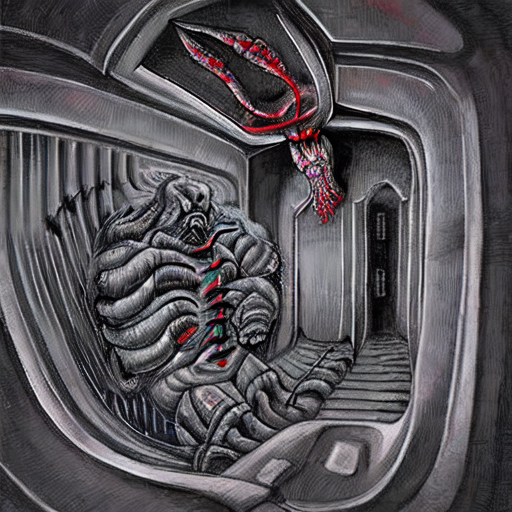

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import PIL.Image

# Load Waifu Diffusion (Anime-style Stable Diffusion model)
pipe = StableDiffusionPipeline.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Generate image from text
def generate_anime_image(prompt, filename="anime_output.png"):
    image = pipe(prompt, guidance_scale=8.5).images[0]
    image.save(filename)
    print(f"Image saved: {filename}")
    return image

# Test with a sample summary
generate_anime_image("a man turning into a giant insect in a dark surreal bedroom")


In [ ]:
!pip install PyMuPDF
!pip install transformers diffusers accelerate
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [1]:
# ✅ STEP 1: Install Dependencies
!pip install PyMuPDF
!pip install transformers diffusers accelerate
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# ✅ STEP 2: Load Models
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from diffusers import StableDiffusionPipeline
import torch
import os

tokenizer = AutoTokenizer.from_pretrained("pszemraj/led-large-book-summary")
model = AutoModelForSeq2SeqLM.from_pretrained("pszemraj/led-large-book-summary").to("cuda")

pipe = StableDiffusionPipeline.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

os.makedirs("anime_images", exist_ok=True)

# ✅ STEP 3: Upload PDF
from google.colab import files
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

# ✅ STEP 4: Define Functions
def summarize_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=1024)
    inputs = {key: val.to("cuda") for key, val in inputs.items()}
    summary_ids = model.generate(**inputs, max_length=256, num_beams=4)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

def generate_image(prompt, save_path):
    image = pipe(prompt, guidance_scale=8.5).images[0]
    image.save(save_path)

# ✅ STEP 5: Process PDF Pages
doc = fitz.open(pdf_path)

for i in range(len(doc)):
    print(f"Processing page {i+1}/{len(doc)}...")
    text = doc[i].get_text()

    if not text.strip():
        print("Empty page, skipping.")
        continue

    try:
        summary = summarize_text(text)
        filename = f"anime_images/page_{i+1:02d}.png"
        generate_image(summary, filename)
        print(f"✔ Saved {filename}")
    except Exception as e:
        print(f"❌ Failed on page {i+1}: {e}")

# ✅ STEP 6: Zip & Download All Images
import shutil
shutil.make_archive("anime_images", 'zip', "anime_images")
files.download("anime_images.zip")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# ✅ STEP 1: Install Dependencies

# ✅ STEP 2: Import and Setup
import fitz  # PyMuPDF
import os
import torch
from diffusers import StableDiffusionPipeline
from google.colab import files
import shutil

# ✅ STEP 3: Load Anime Diffusion Model
pipe = StableDiffusionPipeline.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# ✅ STEP 4: Upload PDF
print("📂 Please upload your PDF file...")
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

# ✅ STEP 5: Prepare Folder
output_dir = "anime_paragraph_images4"
os.makedirs(output_dir, exist_ok=True)

# ✅ STEP 6: Helper Function to Generate Image
def generate_image(prompt, filename):
    image = pipe(prompt, guidance_scale=8.5).images[0]
    image.save(filename)

# ✅ STEP 7: Extract Paragraphs and Generate Images
doc = fitz.open(pdf_path)
img_count = 1

for page_num in range(len(doc)):
    print(f"📄 Processing page {page_num + 1}/{len(doc)}...")
    page_text = doc[page_num].get_text()
    paragraphs = [p.strip() for p in page_text.split("\n\n") if len(p.strip()) > 20]

    for para in paragraphs:
        try:
            filename = os.path.join(output_dir, f"para_{img_count:03d}.png")
            generate_image(para, filename)
            print(f"✅ Image {img_count} created")
            img_count += 1
        except Exception as e:
            print(f"❌ Failed to generate image for paragraph {img_count}: {e}")

# ✅ STEP 8: Zip and Download
shutil.make_archive(output_dir, 'zip', output_dir)
files.download(f"{output_dir}.zip")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

📂 Please upload your PDF file...


In [ ]:
!pip install opencv-python
import fitz  # PyMuPDF
import os
import torch
from diffusers import StableDiffusionPipeline
from google.colab import files
import shutil
import cv2
import numpy as np


video_filename = "anime_paragraph_video.mp4"
image_files = [os.path.join(output_dir, f) for f in sorted(os.listdir(output_dir)) if f.endswith('.png')]

# Set video parameters
frame_rate = 1  # 1 frame per second
frame_width = 512  # Resize image for video width
frame_height = 512  # Resize image for video height
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_filename, fourcc, frame_rate, (frame_width, frame_height))

# Read images and write them to the video
for image_file in image_files:
    img = cv2.imread(image_file)
    img_resized = cv2.resize(img, (frame_width, frame_height))
    out.write(img_resized)

out.release()  # Finalize the video

# ✅ STEP 9: Download Video
files.download(video_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ STEP 8: Create Video from Images with Text
video_filename = "anime_paragraph_video.mp4"
image_files = [os.path.join(output_dir, f) for f in sorted(os.listdir(output_dir)) if f.endswith('.png')]

# Set video parameters
frame_rate = 1  # 1 frame per second
frame_width = 1024  # Resize image for video width (wider to accommodate text)
frame_height = 512  # Resize image for video height
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_filename, fourcc, frame_rate, (frame_width, frame_height))

# Set Text Parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1
text_color = (255, 255, 255)  # White
margin = 10
max_text_width = frame_width // 2  # Limit text width to half of the frame

# Read images and overlay text for each frame
for image_file in image_files:
    img = cv2.imread(image_file)
    img_resized = cv2.resize(img, (frame_height, frame_height))

    # Get the corresponding paragraph text for the current image
    paragraph = doc[image_files.index(image_file)].get_text().split("\n\n")[0]  # Get the first paragraph

    # Resize text to fit on the right side of the image
    text_lines = paragraph.split(". ")
    y_offset = 0

    # Add the text on the right side of the image
    for line in text_lines:
        cv2.putText(img_resized, line, (frame_height + margin, y_offset + margin), font, font_scale, text_color, font_thickness)
        y_offset += 30  # Add some space between lines

    # Combine the image and text into one frame
    final_frame = np.hstack((img_resized, img_resized))  # Create a side-by-side frame (image + text)

    # Write the frame to the video
    out.write(final_frame)

out.release()  # Finalize the video

# ✅ STEP 9: Download Video
files.download(video_filename)


IndexError: page 77 not in document

In [ ]:
video_filename = "anime_paragraph_video.mp4"
image_files = [os.path.join(output_dir, f) for f in sorted(os.listdir(output_dir)) if f.endswith('.png')]

# Set video parameters
frame_rate = 1  # 1 frame per second
frame_width = 1024  # Resize image for video width (wider to accommodate text)
frame_height = 512  # Resize image for video height
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_filename, fourcc, frame_rate, (frame_width, frame_height))

# Set Text Parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1
text_color = (255, 255, 255)  # White
margin = 10
max_text_width = frame_width // 2  # Limit text width to half of the frame

# Read images and overlay text for each frame
for image_file in image_files:
    img = cv2.imread(image_file)
    img_resized = cv2.resize(img, (frame_height, frame_height))

    # Get the corresponding paragraph text for the current image
    paragraph = doc[image_files.index(image_file)].get_text().split("\n\n")[0]  # Get the first paragraph

    # Resize text to fit on the right side of the image
    text_lines = paragraph.split(". ")
    y_offset = 0

    # Add the text on the right side of the image
    for line in text_lines:
        cv2.putText(img_resized, line, (frame_height + margin, y_offset + margin), font, font_scale, text_color, font_thickness)
        y_offset += 30  # Add some space between lines

    # Combine the image and text into one frame
    final_frame = np.hstack((img_resized, img_resized))  # Create a side-by-side frame (image + text)

    # Write the frame to the video
    out.write(final_frame)

out.release()  # Finalize the video

# ✅ STEP 9: Download Video
files.download(video_filename)

IndexError: page 77 not in document

In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=9f69fa4c0b4dccf7b3250daf853905dcae83a013e74a0d0f835dc5c894c4233d
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
